## Baseline model - SBR

![sbr](https://user-images.githubusercontent.com/97432613/160314242-cbea5a9c-122b-43ff-bd62-efc71897019b.png)

[SBR Full Paper](https://arxiv.org/pdf/1807.00966.pdf)

[Stability eval metric Full Paper](https://sci-hub.se/10.1016/j.jfranklin.2019.12.043)

In [34]:
from PIL import Image 
import imageio
import glob
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
import os

# 1. Data preprocess

### 1) 사용한 데이터

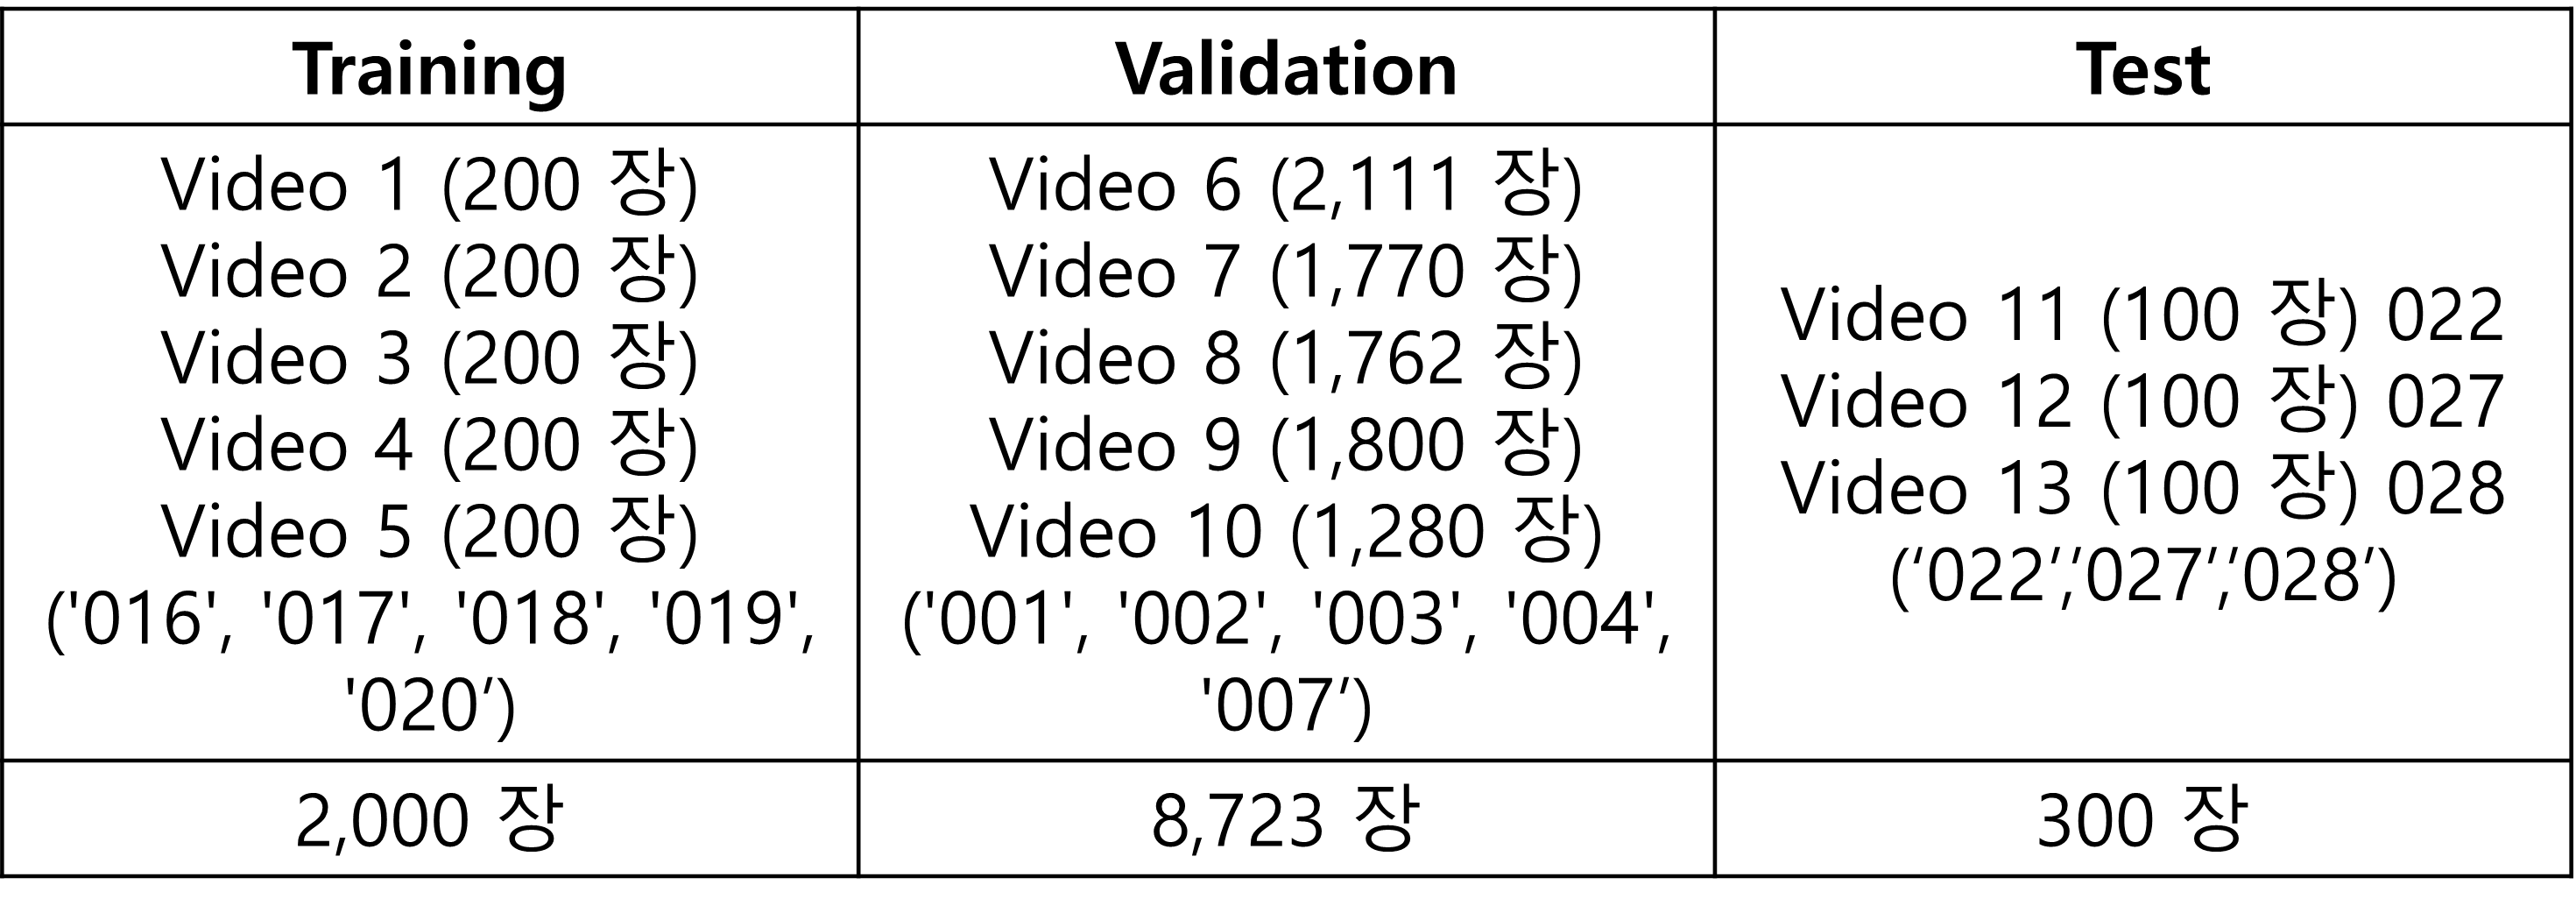

### 2) 전처리

In [13]:
# video -> image
!python ./cache_data/extrct_300VW.py
!bash ./cache/Extract300VW.sh

# images -> train.lst + test.lst 
!python ./cache_data/generate_300VW.py

ffmpeg version 4.1.8-0+deb10u1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version=0+deb10u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --en

frame= 1951 fps= 83 q=-0.0 Lsize=N/A time=00:01:18.08 bitrate=N/A speed= 3.3x    
video:909465kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 4.1.8-0+deb10u1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version=0+deb10u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --en

Output #0, image2, to '/app/landmark-detection/SBR2/datasets/landmark-datasets/300VW_Dataset_2015_12_14/007/extraction/%06d.png':
  Metadata:
    encoder         : Lavf58.20.100
    Stream #0:0: Video: png, rgb24, 1280x720 [SAR 1:1 DAR 16:9], q=2-31, 200 kb/s, 30 fps, 30 tbn, 30 tbc
    Metadata:
      encoder         : Lavc58.35.100 png
frame= 1828 fps= 64 q=-0.0 Lsize=N/A time=00:01:00.96 bitrate=N/A speed=2.12x    
video:1876966kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 4.1.8-0+deb10u1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version=0+deb10u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --

[mpeg4 @ 0x556298809fc0] Video uses a non-standard and wasteful way to store B-frames ('packed B-frames'). Consider using the mpeg4_unpack_bframes bitstream filter without encoding but stream copy to fix it.
Output #0, image2, to '/app/landmark-detection/SBR2/datasets/landmark-datasets/300VW_Dataset_2015_12_14/018/extraction/%06d.png':
  Metadata:
    encoder         : Lavf58.20.100
    Stream #0:0: Video: png, rgb24, 1280x720 [SAR 1:1 DAR 16:9], q=2-31, 200 kb/s, 25 fps, 25 tbn, 25 tbc
    Metadata:
      encoder         : Lavc58.35.100 png
frame= 1762 fps= 83 q=-0.0 Lsize=N/A time=00:01:10.52 bitrate=N/A speed= 3.3x    
video:898740kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 4.1.8-0+deb10u1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version=0+deb10u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arc

frame= 1475 fps= 59 q=-0.0 Lsize=N/A time=00:00:49.24 bitrate=N/A speed=1.98x    
video:1666100kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown
ffmpeg version 4.1.8-0+deb10u1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version=0+deb10u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --e

# 2. Train

[pre-trained model download](https://drive.google.com/drive/folders/1ylMoVuUaNPqP7GSeWS3yE-wfU9JEJSSu)

[datasets download - 현재 ipynb 파일과 동일 위치에 datasets 폴더 위치시킴](https://drive.google.com/drive/folders/13hdfRBHcdSfHloW_h_U6j9_h59n6Q4n1?usp=sharing)

[snapshots-video5-half 결과 폴더 다운로드(참고용)](https://drive.google.com/drive/folders/13lPyfMbO5Jx-sZddk7Apzray02N35AII?usp=sharing)

In [ ]:
# 아래 명령어 주피터노트북에서 실행 안됨 -> 터미널에서 실행 가능
# 실행 로그 및 결과 폴더 첨부 (last epoch의 모델만 첨부)
# snapshots-video5-half/ 

In [19]:
!CUDA_VISIBLE_DEVICES=0 python ./exps/lk_main.py --train_lists ./cache_data/lists/300VW/300VW.train.lst ./cache_data/lists/300VW/300VW.train.lst.none --eval_ilists ./cache_data/lists/300VW/300VW.test-1.lst --num_pts 68 --model_config ./configs/Detector.config --opt_config ./configs/SGD.config  --lk_config ./configs/lk.config --video_parser x-1-1 --save_path ./snapshots-video5/               --init_model ./cpm_vgg16-epoch-049-050.pth     --pre_crop_expand 0.2 --sigma 4 --batch_size 8 --crop_perturb_max 5 --scale_prob 1 --scale_min 1 --scale_max 1 --scale_eval 1 --heatmap_type gaussian --print_freq 10

Error: mkl-service + Intel(R) MKL: MKL_THREADING_LAYER=INTEL is incompatible with libgomp-a34b3233.so.1 library.
	Try to import numpy first or set the threading layer accordingly. Set MKL_SERVICE_FORCE_INTEL to force it.


# 3. Test - 10장 이미지로 테스트

[testsets download - 3개의 테스트케이스 각 100장씩으로 구성, 현재 ipynb 와 동일 위치에 testsets 폴더 위치시킴](https://drive.google.com/drive/folders/18mlO6VyzfBrfiFyEHsEIi_2EjBQ89aXZ?usp=sharing)

### 1) predict

##### - 결과 이미지, predict points TXT 파일 저장

In [25]:
# !CUDA_VISIBLE_DEVICES=0 python ./exps/eval.py --image ./datasets/landmark-datasets/300VW_Dataset_2015_12_14/001/extraction/000001.png --model ./snapshots-video5-half/checkpoint/cpm_vgg16-epoch-049-050.pth --face 700 90 919 318  --save ./result/result.png

# test 1
!CUDA_VISIBLE_DEVICES=0 python ./exps/eval_folder.py --image_folder ./testsets/test1/ --model './snapshots-video5-half/checkpoint/cpm_vgg16-epoch-049-050.pth' --face 740 132 959 349 --save_folder './result/test1/'
# test 2
!CUDA_VISIBLE_DEVICES=0 python ./exps/eval_folder.py --image_folder ./testsets/test2/ --model './snapshots-video5-half/checkpoint/cpm_vgg16-epoch-049-050.pth' --face 257 43 500 286 --save_folder './result/test2/'
# test 3
!CUDA_VISIBLE_DEVICES=0 python ./exps/eval_folder.py --image_folder ./testsets/test3/ --model './snapshots-video5-half/checkpoint/cpm_vgg16-epoch-049-050.pth' --face 415 45 817 452 --save_folder './result/test3/'

The image is None
The model is ./snapshots-video5-half/checkpoint/cpm_vgg16-epoch-049-050.pth
The face bounding box is [740.0, 132.0, 959.0, 349.0]
path=========================== ./configs/Detector.config
The general dataset initialization done : GeneralDataset(point-num=-1, sigma=4.0, heatmap_type=gaussian, length=0, dataset=300W-68)
Initialize cpm-vgg16 with configure : Configure(arch='cpm_vgg16', stages=3, dilation=[1], pooling=[True, True, True], downsample=8, argmax=4, pretrained=[True])
vgg16_base use pre-trained model
Prepare input data
/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/opt/conda/lib/python3.6/site-packages/torch/

# 4. Post-processing

### 1) 연속된 세 장의 이미지에서 점 위치의 평균을 냄.

In [32]:
def SaveDottedImage_threePointAvg(oriimg_path, txt_path, save_path, facebox_xyxy):
    txtli = glob.glob(txt_path+'/*.txt')
    txtli.sort()
    
    lines_stack=[]
    for txtfile in txtli :
        with open(txtfile, 'r') as f:
            lines = f.readlines()
            lines_stack.append(lines)
            
    
    print('len(lines_stack)=',len(lines_stack))
    
    arr = np.zeros((len(lines_stack), 68,2))
    for i in range(len(lines_stack[0])): #68
        for j in range(1, len(lines_stack)-1): #100
            
            x0 = int(float(lines_stack[j-1][i].split(',')[0]))
            y0 = int(float(lines_stack[j-1][i].split(',')[1]))
            x1 = int(float(lines_stack[j][i].split(',')[0]))
            y1 = int(float(lines_stack[j][i].split(',')[1]))
            x2 = int(float(lines_stack[j+1][i].split(',')[0]))
            y2 = int(float(lines_stack[j+1][i].split(',')[1]))
                
            
            x1=(x0+x1+x2)/3
            y1=(y0+y1+y2)/3
            
            arr[j,i]=[x1,y1]
            
            if j==1:
                arr[j-1,i]=[x0,y0]
            
            if j==len(lines_stack)-2:
                arr[j+1,i]=[x2,y2]
    
    pngli=glob.glob(oriimg_path+'/*.png')
    pngli.sort()
    

    # ==========================================================
    # img 저장
    # ==========================================================
    
    if os.path.isdir(save_path)==False:
        os.mkdir(save_path)        
    
    for i in range(len(pngli)):
        img = cv2.imread(pngli[i])
        for j in range(68):
            x=int(arr[i][j][0])
            y=int(arr[i][j][1])
            cv2.circle(img, (x,y), 1, (255,0,0), -1)# eye
        
        nameonly = pngli[i].split('/')[-1]
        img = cv2.resize(img[facebox_xyxy[1]:facebox_xyxy[3], facebox_xyxy[0]:facebox_xyxy[2]], dsize=(512,512), interpolation=cv2.INTER_AREA)
        cv2.imwrite(save_path + nameonly, img)
    print('Images saved in', save_path)
    
    
    # ==========================================================
    # annot txt 저장
    # ==========================================================
    for i in range(len(arr)):
        nameonly = pngli[i].split('/')[-1]
        f=open(save_path + nameonly[:-4]+'.txt','w')
        for j in range(68):
            x=arr[i][j][0]
            y=arr[i][j][1]
            f.write(str(x)+','+str(y)+'\n')
        f.close()
    print('Text files saved in', save_path)
    
    
    return 0

In [36]:
# test 1
SaveDottedImage_threePointAvg('./testsets/test1/', './result/test1/', './result/test1_threepoint/', [740, 132, 959, 349])
# test 2
SaveDottedImage_threePointAvg('./testsets/test2/', './result/test2/', './result/test2_threepoint/', [257, 43, 500, 286])
# test 3
SaveDottedImage_threePointAvg('./testsets/test3/', './result/test3/', './result/test3_threepoint/', [415, 45, 817, 452])

len(lines_stack)= 100
Images saved in ./result/test1_threepoint/
Text files saved in ./result/test1_threepoint/
len(lines_stack)= 100
Images saved in ./result/test2_threepoint/
Text files saved in ./result/test2_threepoint/
len(lines_stack)= 100
Images saved in ./result/test3_threepoint/
Text files saved in ./result/test3_threepoint/


0

### 2) cv2.calcOpticalFlowPyrLK 함수 사용

#### - pt1에 입력한 좌표가 어디로 이동했는지 파악(return pt2)
#### - 예측한 점 사이 거리와, calcOpticalFlowPyrLK 의 리턴값 중 difference 가 작은 것을 최종 값으로 사용

In [127]:
class Point2D:
    def __init__(self, x, y):
        self.x = x
        self.y = y

        
def getShorterDistPts(Pts_pred1, Pts_pred2, Pts_opt2):
    Pts_new=[]
    for i in range(68):
        p1 = Point2D(x=Pts_pred1[i][0][0], y=Pts_pred1[i][0][1])    # 점1
        p2 = Point2D(x=Pts_pred2[i][0][0], y=Pts_pred2[i][0][1])    # 점2
        p3 = Point2D(x=Pts_opt2[i][0][0], y=Pts_opt2[i][0][1])    # 점3

        d1 = math.sqrt(((p2.x - p1.x) ** 2) + ((p2.y - p1.y) ** 2))
        d2 = math.sqrt(((p3.x - p1.x) ** 2) + ((p3.y - p1.y) ** 2))
        
        if d1 <= d2 :
            Pts_new.append([[Pts_pred2[i][0][0],Pts_pred2[i][0][1]]])
        else:
            Pts_new.append([[Pts_opt2[i][0][0],Pts_opt2[i][0][1]]])
    
    return np.array(Pts_new, dtype='float32')





def getPts(annot_path, filename, st_x, st_y):
    
    with open(annot_path+'%s.txt'%filename) as f:
        lines=f.readlines()

    pts=[]
    for i in range(len(lines)):
        x = float(lines[i].split(',')[0])
        y = float(lines[i].split(',')[1][:-1]) 
        pts.append([[x-st_x, y-st_y]]) 
        
    return np.array(pts,dtype='float32')




def drawCircleAndArrowline(img, pts1, pts2):
    
    cv2.circle(img, tuple(pts1.astype('int')[i, 0]), 1, (0, 255, 255), 2, cv2.LINE_AA)
    cv2.circle(img, tuple(pts2.astype('int')[i, 0]), 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.arrowedLine(img, tuple(pts1.astype('int')[i, 0]), tuple(pts2.astype('int')[i, 0]), (0, 255, 0), 1)
    
    return img


def SaveAnnotTxt(oriImg_path, pred_txt_path, save_path, face_xyxy): # pred point, optical point 비교해서 최적의 point 를 새로 txt로 저장
    
    path_li=glob.glob(oriImg_path+'/*.png')
    path_li.sort()
    
    for i in range(len(path_li)-1):
        path1=path_li[i]
        path2=path_li[i+1]

        src1 = cv2.imread(path1)
        src2 = cv2.imread(path2)
        
        src1 = src1[face_xyxy[1]:face_xyxy[3], face_xyxy[0]:face_xyxy[2]]
        src2 = src2[face_xyxy[1]:face_xyxy[3], face_xyxy[0]:face_xyxy[2]]

        nameonly1 = path1.split('/')[-1].split('.')[0]
        nameonly2 = path2.split('/')[-1].split('.')[0]
        pts_pred1 = getPts(pred_txt_path, nameonly1, face_xyxy[0], face_xyxy[1])
        pts_pred2 = getPts(pred_txt_path, nameonly2, face_xyxy[0], face_xyxy[1])

        # src1, src2에서 움직임 정보를 찾아내고 pt1에 입력한 좌표가 어디로 이동했는지 파악
        pts_opt2, status, err = cv2.calcOpticalFlowPyrLK(src1, src2, pts_pred1, None)
        pts_new = getShorterDistPts(pts_pred1,pts_pred2,pts_opt2)
        
#         if i==0:
#             pts_opt2, status, err = cv2.calcOpticalFlowPyrLK(src1, src2, pts_pred1, None)
#         else:
#             pts_opt2, status, err = cv2.calcOpticalFlowPyrLK(src1, src2, pts_opt2, None)
#         pts_new = pts_opt2
        
        # ==========================================================
        # annot txt 저장
        # ==========================================================
        if os.path.isdir(save_path)==False:
            os.mkdir(save_path)  
        
        if i==0:
            path = save_path +nameonly1+'.txt'
            with open(path, 'w') as f:
                for i in range(len(pts_pred1)):
                    f.write(str(pts_pred1[i][0][0])+','+str(pts_pred1[i][0][1])+'\n')
        
        path = save_path + nameonly2 + '.txt'
        with open(path, 'w') as f:
            for i in range(len(pts_new)):
                f.write(str(pts_new[i][0][0])+','+str(pts_new[i][0][1])+'\n')             
   
    print('Txt files saved in', save_path)
    
    return 0
            

    
    
    
def SaveDottedImage(ori_img_path, txt_path, save_path, face_xyxy): # 새롭게 만든 txt file 가지고 이미지 다시 저장
    txtli = glob.glob(txt_path+'/*.txt')
    txtli.sort()
    
    lines_stack=[]
    for txtfile in txtli :
        with open(txtfile, 'r') as f:
            lines = f.readlines()
            lines_stack.append(lines)
            
    
    print('len(lines_stack)=',len(lines_stack))
    
    arr = np.zeros((len(lines_stack), 68,2))
    
    for i in range(len(lines_stack[0])): #68
        for j in range(len(lines_stack)): #100

            x1 = int(float(lines_stack[j][i].split(',')[0]))
            y1 = int(float(lines_stack[j][i].split(',')[1]))
                       
            arr[j,i]=[x1,y1]
                
    pngli=glob.glob(ori_img_path +'/*.png')
    pngli.sort()
    
    if os.path.isdir(save_path)==False:
        os.mkdir(save_path)  
    
    for i in range(len(pngli)):
        img = cv2.imread(pngli[i])
        img = img[face_xyxy[1]:face_xyxy[3], face_xyxy[0]:face_xyxy[2]]
        for j in range(68):
            x=int(arr[i][j][0])
            y=int(arr[i][j][1])
            cv2.circle(img, (x,y), 1, (255,255,0), -1)# eye
        
        nameonly = pngli[i].split('/')[-1]
        img = cv2.resize(img, dsize=(512,512), interpolation=cv2.INTER_AREA)
        cv2.imwrite(save_path + nameonly, img)    
        
    print('Images saved in', save_path)
    
    return 0

In [82]:
#SaveAnnotTxt(oriImg_path, pred_txt_path, save_path)
SaveAnnotTxt('./testsets/test1/', './result/test1/', './result/test1_optical/', [740, 132, 959, 349])
SaveAnnotTxt('./testsets/test2/', './result/test2/', './result/test2_optical/', [257, 43, 500, 286])
SaveAnnotTxt('./testsets/test3/', './result/test3/', './result/test3_optical/', [415, 45, 817, 452])


#SaveDottedImage(ori_img_path, txt_path, save_path, face_xyxy)
SaveDottedImage('./testsets/test1/', './result/test1_optical/', './result/test1_optical/', [740, 132, 959, 349])
SaveDottedImage('./testsets/test2/', './result/test2_optical/', './result/test2_optical/', [257, 43, 500, 286])
SaveDottedImage('./testsets/test3/', './result/test3_optical/', './result/test3_optical/', [415, 45, 817, 452])

Txt files saved in ./result/test1_optical/
Txt files saved in ./result/test2_optical/
Txt files saved in ./result/test3_optical/
len(lines_stack)= 100
Images saved in ./result/test1_optical/
len(lines_stack)= 100
Images saved in ./result/test2_optical/
len(lines_stack)= 100
Images saved in ./result/test3_optical/


0

In [128]:
SaveDottedImage('./testsets/test1/', './result/test1_optical/', './result/test1_optical/', [740, 132, 959, 349])
SaveDottedImage('./testsets/test2/', './result/test2_optical/', './result/test2_optical/', [257, 43, 500, 286])
SaveDottedImage('./testsets/test3/', './result/test3_optical/', './result/test3_optical/', [415, 45, 817, 452])

len(lines_stack)= 100
Images saved in ./result/test1_optical/
len(lines_stack)= 100
Images saved in ./result/test2_optical/
len(lines_stack)= 100
Images saved in ./result/test3_optical/


0

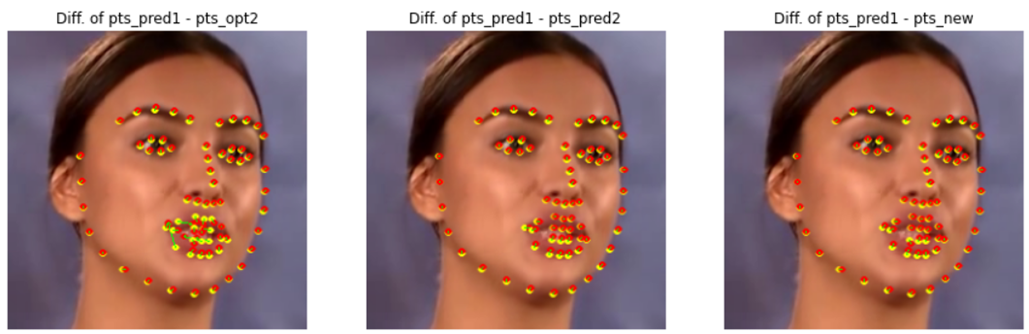

# 4. Evaluate

### 1) 평가 방식 : 각 이미지의 점 위치를 txt 파일로 저장하고, 이를 불러와서 평가 메트릭으로 평가

### 2) 평가 메트릭 : Mean standard deviation

##### - 점들이 얼마나 분산돼있는지

In [109]:
def GetMeanStandardDev(txt_path):
    txtli = glob.glob(txt_path+'/*.txt')
    txtli.sort()
    
    lines_stack=[]
    for txtfile in txtli :
        with open(txtfile, 'r') as f:
            lines = f.readlines()
            lines_stack.append(lines)
            
    li_68=[]
    for i in range(len(lines_stack[0])): #68
        li_nine=[]
        for j in range(len(lines_stack)-1): #10
            
            x1 = int(float(lines_stack[j][i].split(',')[0]))
            y1 = int(float(lines_stack[j][i].split(',')[1]))
            x2 = int(float(lines_stack[j+1][i].split(',')[0]))
            y2 = int(float(lines_stack[j+1][i].split(',')[1]))
            x1=(x1+x2)/2
            y1=(y1+y2)/2
            
            d = math.sqrt(pow(abs(x1-x2),2) + pow(abs(y1-y2),2))

            li_nine.append(d)

        li_68.append(li_nine)

    #print('file cnt = ',len(li_nine)+1)
    #print('point cnt = ',len(li_68))
    
    msd = []
    for idx,i in enumerate(li_68):
        msd.append(np.std(i))

    mean_sd = sum(msd)/len(msd)
    print('Mean std of',txt_path,':',round(mean_sd,3))
    
    return 0

In [110]:
li=['./result/test1/', './result/test1_threepoint/', './result/test1_optical/', \
   './result/test2/', './result/test2_threepoint/', './result/test2_optical/', \
   './result/test3/', './result/test3_threepoint/', './result/test3_optical/']

for path in li :
    GetMeanStandardDev(path)

Mean std of ./result/test1/ : 1.018
Mean std of ./result/test1_threepoint/ : 0.942
Mean std of ./result/test1_optical/ : 1.033
Mean std of ./result/test2/ : 1.014
Mean std of ./result/test2_threepoint/ : 0.644
Mean std of ./result/test2_optical/ : 0.974
Mean std of ./result/test3/ : 1.876
Mean std of ./result/test3_threepoint/ : 1.45
Mean std of ./result/test3_optical/ : 1.839
